In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

In [3]:
train_set = r'C:\Users\tavor\Downloads\archive (9)\train\train'
image_size = 50

In [4]:
def label_img(img):
    word_label=img.split('.')[-3]
    if word_label=='cat':return [0]
    elif word_label =='dog':return [1]

In [5]:
def create_train_data():
    training_data=[]
    for img in (os.listdir(train_set)):
        label=label_img(img)
        path=os.path.join(train_set,img)
        img=cv2.resize(cv2.imread(path,cv2.IMREAD_GRAYSCALE),(image_size,image_size))
        training_data.append([img,label])
    np.save('train_data.npy',training_data)
    return training_data

In [6]:
def process_test_data():
    testing_data=[]
    for img in (os.listdir(test_dir)):
        path=os.path.join(test_dir,img)
        img = cv2.resize(cv2.imread(path,cv2.IMREAD_GRAYSCALE),(image_size,image_size))
        testing_data.append(img)
    np.save('teat_data.npy',testing_data)  
    return testing_data

In [7]:
pic_of_cats_and_dogs = create_train_data()

In [8]:
pic_of_cats_and_dogs

[[array([[172, 180, 186, ..., 220, 213, 207],
         [172, 179, 187, ..., 221, 216, 210],
         [171, 179, 181, ..., 219, 217, 215],
         ...,
         [134, 137, 140, ...,   5,   5,   5],
         [129, 134, 136, ...,   3,   3,   3],
         [126, 131, 134, ...,   2,   2,   2]], dtype=uint8),
  [0]],
 [array([[ 42,  58,  38, ...,  96,  93, 193],
         [ 43,  45,  44, ...,  82,  81, 203],
         [ 43,  43,  45, ...,  87,  88, 193],
         ...,
         [ 25,  20,  25, ...,  40,  68,  74],
         [ 20,  21,  22, ...,  77,  38,  93],
         [ 23,  22,  20, ...,  57,  62,  29]], dtype=uint8),
  [0]],
 [array([[ 44,  47,  53, ..., 148, 149, 153],
         [ 58,  59,  69, ..., 152, 151, 157],
         [ 59,  64,  59, ..., 155, 155, 158],
         ...,
         [156, 150, 129, ..., 149, 168, 166],
         [160, 143, 139, ..., 145, 166, 169],
         [154, 143, 132, ..., 143, 163, 165]], dtype=uint8),
  [0]],
 [array([[221, 224, 235, ..., 230, 245, 236],
         [224, 

In [ ]:
#######################################
img = pic[0][0][0]
#plt.imshow(pic, 'gray')
img

In [9]:
def create_row_of_pic(y):
    df1 = pd.DataFrame(pic_of_cats_and_dogs[y][0][0])
    for i in range (49):
        df2 = pd.DataFrame(pic_of_cats_and_dogs[y][0][i])
        df1 = df1.append(df2)
    df3 = pd.DataFrame(pic_of_cats_and_dogs[y][1])
    df1 = df1.append(df3)
    df1 = df1.transpose()
    return df1

In [12]:
data = pd.DataFrame()
for i in range (1,25000):
    temp = create_row_of_pic(i)
    data = data.append(temp)
    
data  

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,0
0,42,58,38,42,44,37,38,39,41,44,...,41,42,55,52,65,94,77,38,93,0
0,44,47,53,58,56,52,51,48,42,44,...,68,66,68,92,102,130,145,166,169,0
0,221,224,235,237,223,227,233,228,226,224,...,248,241,225,220,206,207,214,218,213,0
0,113,124,91,134,197,153,207,230,150,255,...,116,100,92,85,70,57,76,83,84,0
0,8,8,8,8,8,8,8,8,8,6,...,24,24,23,23,21,22,20,19,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,141,144,147,148,149,151,153,153,155,158,...,162,164,163,164,164,167,167,168,169,1
0,87,93,78,77,64,88,81,69,119,111,...,57,85,80,79,91,73,88,107,67,1
0,49,54,53,45,51,49,54,33,97,65,...,146,157,128,139,197,130,162,173,134,1
0,253,237,201,123,107,90,79,86,94,86,...,121,106,100,95,106,122,129,122,128,1


In [13]:
columns = np.arange(0,2501)
rows = np.arange(0,24999)

In [14]:
data = data.set_axis(columns, axis= 'columns')
data = data.set_index(rows)

In [15]:
data.to_csv('catsVsDogs_.csv')

In [28]:
data

,0,1,2,3,4,5,6,7,8,9,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,42,58,38,42,44,37,38,39,41,44,...,41,42,55,52,65,94,77,38,93,0
1,44,47,53,58,56,52,51,48,42,44,...,68,66,68,92,102,130,145,166,169,0
2,221,224,235,237,223,227,233,228,226,224,...,248,241,225,220,206,207,214,218,213,0
3,113,124,91,134,197,153,207,230,150,255,...,116,100,92,85,70,57,76,83,84,0
4,8,8,8,8,8,8,8,8,8,6,...,24,24,23,23,21,22,20,19,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,141,144,147,148,149,151,153,153,155,158,...,162,164,163,164,164,167,167,168,169,1
24995,87,93,78,77,64,88,81,69,119,111,...,57,85,80,79,91,73,88,107,67,1
24996,49,54,53,45,51,49,54,33,97,65,...,146,157,128,139,197,130,162,173,134,1
24997,253,237,201,123,107,90,79,86,94,86,...,121,106,100,95,106,122,129,122,128,1


In [29]:
cat_dog = data.copy()
cat_dog

,0,1,2,3,4,5,6,7,8,9,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,42,58,38,42,44,37,38,39,41,44,...,41,42,55,52,65,94,77,38,93,0
1,44,47,53,58,56,52,51,48,42,44,...,68,66,68,92,102,130,145,166,169,0
2,221,224,235,237,223,227,233,228,226,224,...,248,241,225,220,206,207,214,218,213,0
3,113,124,91,134,197,153,207,230,150,255,...,116,100,92,85,70,57,76,83,84,0
4,8,8,8,8,8,8,8,8,8,6,...,24,24,23,23,21,22,20,19,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,141,144,147,148,149,151,153,153,155,158,...,162,164,163,164,164,167,167,168,169,1
24995,87,93,78,77,64,88,81,69,119,111,...,57,85,80,79,91,73,88,107,67,1
24996,49,54,53,45,51,49,54,33,97,65,...,146,157,128,139,197,130,162,173,134,1
24997,253,237,201,123,107,90,79,86,94,86,...,121,106,100,95,106,122,129,122,128,1


In [17]:
#################################################33
dogVsCat = pd.read_csv (r'C:\Users\tavor\Desktop\catsVsDogs_.csv')
df = dogVsCat.copy()
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,0,42,58,38,42,44,37,38,39,41,...,41,42,55,52,65,94,77,38,93,0
1,1,44,47,53,58,56,52,51,48,42,...,68,66,68,92,102,130,145,166,169,0
2,2,221,224,235,237,223,227,233,228,226,...,248,241,225,220,206,207,214,218,213,0
3,3,113,124,91,134,197,153,207,230,150,...,116,100,92,85,70,57,76,83,84,0
4,4,8,8,8,8,8,8,8,8,8,...,24,24,23,23,21,22,20,19,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,24994,141,144,147,148,149,151,153,153,155,...,162,164,163,164,164,167,167,168,169,1
24995,24995,87,93,78,77,64,88,81,69,119,...,57,85,80,79,91,73,88,107,67,1
24996,24996,49,54,53,45,51,49,54,33,97,...,146,157,128,139,197,130,162,173,134,1
24997,24997,253,237,201,123,107,90,79,86,94,...,121,106,100,95,106,122,129,122,128,1


In [30]:
cat_dog.rename(columns={2500:'label'} , inplace = True)
cat_dog

,0,1,2,3,4,5,6,7,8,9,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,label
0,42,58,38,42,44,37,38,39,41,44,...,41,42,55,52,65,94,77,38,93,0
1,44,47,53,58,56,52,51,48,42,44,...,68,66,68,92,102,130,145,166,169,0
2,221,224,235,237,223,227,233,228,226,224,...,248,241,225,220,206,207,214,218,213,0
3,113,124,91,134,197,153,207,230,150,255,...,116,100,92,85,70,57,76,83,84,0
4,8,8,8,8,8,8,8,8,8,6,...,24,24,23,23,21,22,20,19,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,141,144,147,148,149,151,153,153,155,158,...,162,164,163,164,164,167,167,168,169,1
24995,87,93,78,77,64,88,81,69,119,111,...,57,85,80,79,91,73,88,107,67,1
24996,49,54,53,45,51,49,54,33,97,65,...,146,157,128,139,197,130,162,173,134,1
24997,253,237,201,123,107,90,79,86,94,86,...,121,106,100,95,106,122,129,122,128,1


In [31]:
class_table = ["Cat", "Dog"]
def get_label_cls(label):
    """given an int label range [0,9], return the string description of that label"""
    return class_table[label]

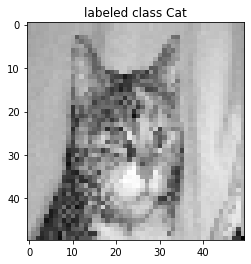

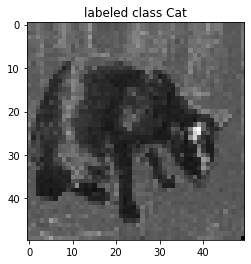

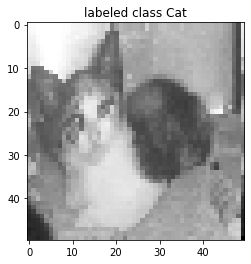

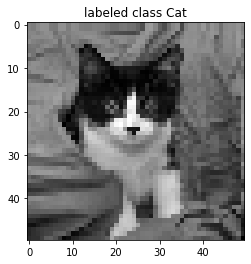

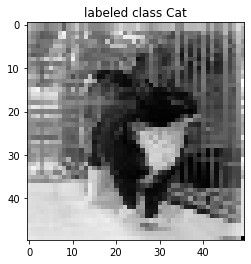

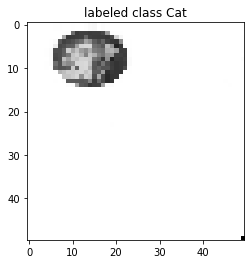

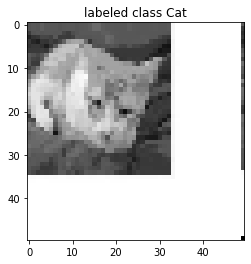

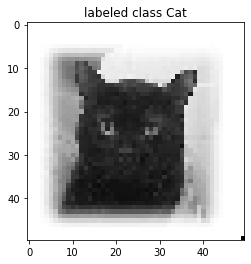

In [32]:
#show cats
for i in range(10,50,5):     
    sample = np.reshape(cat_dog[cat_dog.columns[1:]].iloc[i].values/255, (50,50))
    plt.figure()
    plt.title("labeled class {}".format(get_label_cls(cat_dog["label"].iloc[i])))
    plt.imshow(sample, 'gray')

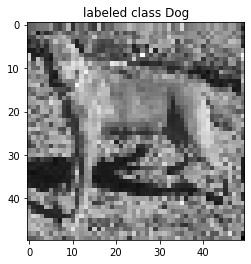

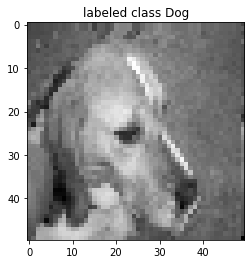

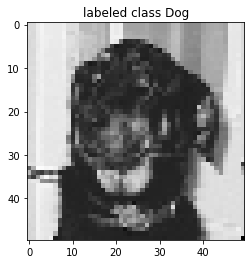

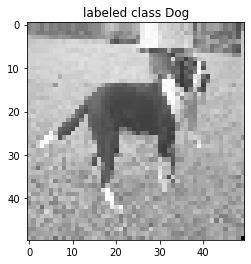

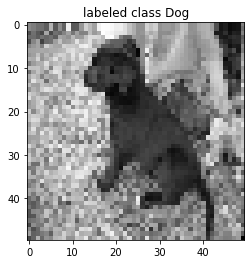

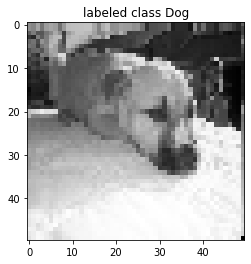

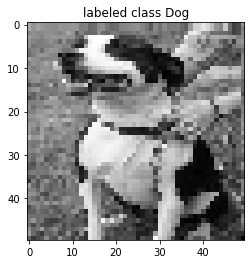

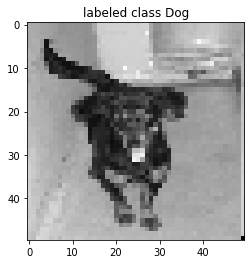

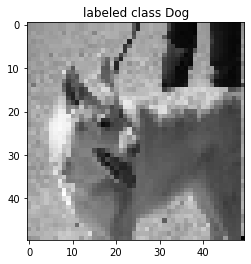

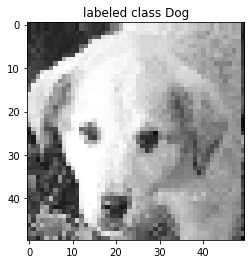

In [33]:
#show dogs
for i in range(20000,20050,5):    
    sample = np.reshape(cat_dog[cat_dog.columns[1:]].iloc[i].values/255, (50,50))
    plt.figure()
    plt.title("labeled class {}".format(get_label_cls(cat_dog["label"].iloc[i])))
    plt.imshow(sample, 'gray')

In [34]:
cats_test = pd.DataFrame(cat_dog[:1250])
dogs_test = pd.DataFrame(cat_dog[23749:24999])

In [35]:
cats_test

,0,1,2,3,4,5,6,7,8,9,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,label
0,42,58,38,42,44,37,38,39,41,44,...,41,42,55,52,65,94,77,38,93,0
1,44,47,53,58,56,52,51,48,42,44,...,68,66,68,92,102,130,145,166,169,0
2,221,224,235,237,223,227,233,228,226,224,...,248,241,225,220,206,207,214,218,213,0
3,113,124,91,134,197,153,207,230,150,255,...,116,100,92,85,70,57,76,83,84,0
4,8,8,8,8,8,8,8,8,8,6,...,24,24,23,23,21,22,20,19,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,68,17,51,56,90,52,40,76,95,56,...,203,225,249,253,166,232,247,251,252,0
1246,49,41,69,69,104,90,87,68,57,68,...,135,129,123,116,110,104,98,70,65,0
1247,64,65,63,33,17,67,68,70,70,63,...,138,136,141,139,114,136,137,137,137,0
1248,36,71,119,71,67,64,75,98,55,72,...,134,103,178,157,166,162,155,152,150,0


In [36]:
dogs_test

,0,1,2,3,4,5,6,7,8,9,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,label
23749,124,121,119,119,113,112,110,110,103,99,...,140,161,175,176,149,82,58,54,46,1
23750,93,91,92,167,137,90,91,89,89,87,...,137,130,136,136,137,138,139,137,142,1
23751,10,36,10,38,2,20,24,14,18,17,...,195,192,192,196,193,190,191,173,190,1
23752,91,92,60,76,60,78,73,71,68,66,...,114,121,135,123,119,134,126,132,123,1
23753,95,225,246,238,237,248,243,231,229,253,...,175,152,182,156,165,153,143,157,95,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,141,144,147,148,149,151,153,153,155,158,...,162,164,163,164,164,167,167,168,169,1
24995,87,93,78,77,64,88,81,69,119,111,...,57,85,80,79,91,73,88,107,67,1
24996,49,54,53,45,51,49,54,33,97,65,...,146,157,128,139,197,130,162,173,134,1
24997,253,237,201,123,107,90,79,86,94,86,...,121,106,100,95,106,122,129,122,128,1


In [41]:
cat_dog_for_model = cat_dog.iloc[1250:23749]
cat_dog_for_model

,0,1,2,3,4,5,6,7,8,9,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,label
1250,185,186,185,184,186,188,187,183,188,188,...,187,193,193,188,191,187,184,185,179,0
1251,43,47,48,55,24,33,38,32,40,38,...,160,154,133,128,123,133,154,122,121,0
1252,22,17,16,16,13,16,5,2,92,61,...,49,35,38,40,45,50,43,36,6,0
1253,152,166,165,165,163,165,163,161,150,150,...,39,29,20,83,91,248,254,248,213,0
1254,109,153,154,137,124,122,157,171,171,73,...,208,186,183,167,145,20,17,19,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23744,157,159,155,154,158,153,156,153,153,157,...,231,234,235,234,234,236,235,232,235,1
23745,126,254,255,251,246,240,236,227,220,218,...,137,123,121,128,124,124,115,121,134,1
23746,132,129,130,130,130,126,127,125,123,125,...,88,102,94,97,110,119,112,102,94,1
23747,79,75,72,72,73,72,58,57,85,112,...,120,107,116,50,52,51,51,49,46,1


In [42]:
cat_dog_for_model.shape

(22499, 2501)

In [44]:
cat_dog_for_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22499 entries, 1250 to 23748
Columns: 2501 entries, 0 to label
dtypes: int64(2501)
memory usage: 429.5 MB


In [45]:
cat_dog_for_model.describe()

,0,1,2,3,4,5,6,7,8,9,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,label
count,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,...,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000
mean,114.135695,114.800836,115.598338,116.192764,116.915818,117.533935,118.106049,118.460332,118.520823,119.084937,...,126.025379,125.300991,124.809592,124.571581,123.866661,123.044758,122.000133,121.146673,120.399662,0.500022
std,69.392448,69.165733,68.889753,68.956828,69.019273,68.966297,69.052841,68.756040,68.815994,68.771718,...,64.485388,64.508546,64.509701,64.569273,64.617299,64.570221,64.963305,65.129535,65.863585,0.500011
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57.000000,57.000000,59.000000,59.000000,60.000000,61.000000,61.000000,62.000000,62.000000,62.000000,...,76.000000,75.000000,74.000000,74.000000,73.000000,72.000000,71.000000,70.000000,68.000000,0.000000
50%,109.000000,109.000000,111.000000,111.000000,112.000000,113.000000,114.000000,114.000000,114.000000,115.000000,...,125.000000,124.000000,123.000000,123.000000,123.000000,122.000000,120.000000,119.000000,118.000000,1.000000
75%,165.000000,166.000000,167.000000,167.000000,168.000000,169.000000,170.000000,170.000000,170.000000,171.000000,...,174.000000,173.000000,172.500000,172.000000,172.000000,170.000000,169.000000,168.000000,168.000000,1.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,1.000000


In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
#from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
 


In [46]:
x = cat_dog_for_model.drop(["label"], axis = 1)
y = cat_dog_for_model["label"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16874, 2500)
(5625, 2500)
(16874,)
(5625,)


In [47]:
#normalizatya
scaler = MinMaxScaler(feature_range=(0,1)) 

#assign scaler to column:
cat_dog_for_model_s = pd.DataFrame(scaler.fit_transform(cat_dog_for_model), columns=cat_dog_for_model.columns)
cat_dog_for_model_s


,0,1,2,3,4,5,6,7,8,9,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,label
0,0.725490,0.729412,0.725490,0.721569,0.729412,0.737255,0.733333,0.717647,0.737255,0.737255,...,0.733333,0.756863,0.756863,0.737255,0.749020,0.733333,0.721569,0.725490,0.701961,0.0
1,0.168627,0.184314,0.188235,0.215686,0.094118,0.129412,0.149020,0.125490,0.156863,0.149020,...,0.627451,0.603922,0.521569,0.501961,0.482353,0.521569,0.603922,0.478431,0.474510,0.0
2,0.086275,0.066667,0.062745,0.062745,0.050980,0.062745,0.019608,0.007843,0.360784,0.239216,...,0.192157,0.137255,0.149020,0.156863,0.176471,0.196078,0.168627,0.141176,0.023529,0.0
3,0.596078,0.650980,0.647059,0.647059,0.639216,0.647059,0.639216,0.631373,0.588235,0.588235,...,0.152941,0.113725,0.078431,0.325490,0.356863,0.972549,0.996078,0.972549,0.835294,0.0
4,0.427451,0.600000,0.603922,0.537255,0.486275,0.478431,0.615686,0.670588,0.670588,0.286275,...,0.815686,0.729412,0.717647,0.654902,0.568627,0.078431,0.066667,0.074510,0.050980,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22494,0.615686,0.623529,0.607843,0.603922,0.619608,0.600000,0.611765,0.600000,0.600000,0.615686,...,0.905882,0.917647,0.921569,0.917647,0.917647,0.925490,0.921569,0.909804,0.921569,1.0
22495,0.494118,0.996078,1.000000,0.984314,0.964706,0.941176,0.925490,0.890196,0.862745,0.854902,...,0.537255,0.482353,0.474510,0.501961,0.486275,0.486275,0.450980,0.474510,0.525490,1.0
22496,0.517647,0.505882,0.509804,0.509804,0.509804,0.494118,0.498039,0.490196,0.482353,0.490196,...,0.345098,0.400000,0.368627,0.380392,0.431373,0.466667,0.439216,0.400000,0.368627,1.0
22497,0.309804,0.294118,0.282353,0.282353,0.286275,0.282353,0.227451,0.223529,0.333333,0.439216,...,0.470588,0.419608,0.454902,0.196078,0.203922,0.200000,0.200000,0.192157,0.180392,1.0


In [48]:
cat_dog_for_model_s.describe()

,0,1,2,3,4,5,6,7,8,9,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,label
count,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,...,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000
mean,0.447591,0.450199,0.453327,0.455658,0.458493,0.460917,0.463161,0.464550,0.464788,0.467000,...,0.494217,0.491376,0.489449,0.488516,0.485752,0.482528,0.478432,0.475085,0.472156,0.500022
std,0.272127,0.271238,0.270156,0.270419,0.270664,0.270456,0.270795,0.269632,0.269867,0.269693,...,0.252884,0.252975,0.252979,0.253213,0.253401,0.253217,0.254758,0.255410,0.258289,0.500011
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223529,0.223529,0.231373,0.231373,0.235294,0.239216,0.239216,0.243137,0.243137,0.243137,...,0.298039,0.294118,0.290196,0.290196,0.286275,0.282353,0.278431,0.274510,0.266667,0.000000
50%,0.427451,0.427451,0.435294,0.435294,0.439216,0.443137,0.447059,0.447059,0.447059,0.450980,...,0.490196,0.486275,0.482353,0.482353,0.482353,0.478431,0.470588,0.466667,0.462745,1.000000
75%,0.647059,0.650980,0.654902,0.654902,0.658824,0.662745,0.666667,0.666667,0.666667,0.670588,...,0.682353,0.678431,0.676471,0.674510,0.674510,0.666667,0.662745,0.658824,0.658824,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
X_train_scal = pd.DataFrame(scaler.fit_transform(X_train), columns= X_train.columns)
X_train_scal

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0.392157,0.411765,0.427451,0.439216,0.454902,0.462745,0.470588,0.486275,0.494118,0.505882,...,0.533333,0.525490,0.513725,0.509804,0.376471,0.372549,0.396078,0.411765,0.431373,0.431373
1,0.827451,0.827451,0.823529,0.815686,0.823529,0.819608,0.819608,0.811765,0.815686,0.815686,...,0.839216,0.843137,0.847059,0.827451,0.839216,0.839216,0.839216,0.831373,0.831373,0.823529
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,0.529412,0.109804,0.058824,0.509804,0.082353,0.698039,0.082353,0.509804,0.125490,0.152941,...,0.933333,0.792157,0.776471,0.588235,0.541176,0.815686,0.886275,0.862745,0.964706,0.654902
4,0.078431,0.149020,0.141176,0.133333,0.043137,0.145098,0.270588,0.450980,0.474510,0.478431,...,0.772549,0.784314,0.713725,0.780392,0.811765,0.701961,0.803922,0.764706,0.745098,0.733333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16869,0.662745,0.545098,0.576471,0.588235,0.600000,0.560784,0.380392,0.603922,0.325490,0.635294,...,0.772549,0.309804,0.231373,0.247059,0.200000,0.176471,0.192157,0.172549,0.203922,0.180392
16870,0.094118,0.239216,0.458824,0.482353,0.450980,0.494118,0.529412,0.549020,0.517647,0.458824,...,0.333333,0.203922,0.286275,0.121569,0.074510,0.050980,0.027451,0.015686,0.011765,0.011765
16871,0.298039,0.301961,0.490196,0.498039,0.505882,0.509804,0.498039,0.501961,0.505882,0.505882,...,0.874510,0.776471,0.866667,0.878431,0.858824,0.866667,0.862745,0.858824,0.854902,0.854902
16872,0.588235,0.576471,0.560784,0.627451,0.674510,0.698039,0.725490,0.701961,0.686275,0.682353,...,0.698039,0.686275,0.733333,0.705882,0.725490,0.721569,0.713725,0.698039,0.752941,0.717647


In [50]:
X_test_scal = pd.DataFrame(scaler.transform(X_test), columns= X_test.columns)
X_test_scal

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0.909804,0.921569,0.929412,0.929412,0.929412,0.929412,0.929412,0.929412,0.929412,0.929412,...,0.317647,0.317647,0.317647,0.317647,0.317647,0.317647,0.317647,0.317647,0.247059,0.937255
1,0.160784,0.156863,0.145098,0.156863,0.172549,0.200000,0.188235,0.188235,0.152941,0.266667,...,0.368627,0.352941,0.337255,0.305882,0.309804,0.294118,0.247059,0.250980,0.254902,0.258824
2,0.776471,0.803922,0.803922,0.807843,0.827451,0.792157,0.819608,0.815686,0.827451,0.831373,...,0.486275,0.517647,0.494118,0.443137,0.415686,0.454902,0.486275,0.462745,0.470588,0.450980
3,0.462745,0.482353,0.533333,0.552941,0.607843,0.631373,0.635294,0.654902,0.674510,0.674510,...,0.298039,0.247059,0.227451,0.282353,0.235294,0.243137,0.262745,0.294118,0.282353,0.270588
4,0.662745,0.647059,0.533333,0.588235,0.486275,0.576471,0.352941,0.541176,0.529412,0.309804,...,0.639216,0.607843,0.603922,0.568627,0.576471,0.572549,0.560784,0.552941,0.529412,0.525490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5620,0.274510,0.329412,0.317647,0.337255,0.309804,0.654902,0.364706,0.392157,0.419608,0.360784,...,0.686275,0.733333,0.721569,0.654902,0.686275,0.705882,0.686275,0.686275,0.682353,0.686275
5621,0.247059,0.172549,0.341176,0.219608,0.737255,0.843137,0.882353,0.870588,0.945098,0.905882,...,0.866667,0.854902,0.854902,0.858824,0.835294,0.839216,0.835294,0.788235,0.792157,0.729412
5622,0.400000,0.400000,0.403922,0.403922,0.407843,0.407843,0.411765,0.415686,0.419608,0.419608,...,0.219608,0.188235,0.164706,0.160784,0.164706,0.168627,0.168627,0.184314,0.219608,0.219608
5623,0.298039,0.286275,0.286275,0.278431,0.780392,0.941176,0.988235,1.000000,1.000000,1.000000,...,0.298039,0.298039,0.282353,0.266667,0.274510,0.235294,0.164706,0.219608,0.211765,0.200000


In [ ]:
accuracy = []
for i in range (1,25):
    model_knn = KNeighborsClassifier(n_neighbors = i)
    model_knn_fit = model_knn.fit(X_train_scal, y_train)
    model_knn_pred = model_knn.predict(X_test_scal)
    acc_knn = accuracy_score(y_test, model_knn_pred)
    accuracy.append(round(acc_knn,3)*100)
index = accuracy.index(max(accuracy))+1
accuracy
print("The Accuracy score for " + str(index) +" nearest neighbers is: " + str(max(accuracy)) +"%")

In [ ]:
plt.plot(range(1,50),accuracy)
plt.show()